In [1]:
from interpreting_neurons_utils import *

/hpi/fs00/home/jim.maar/miniconda3/envs/othello-env/lib/python3.11/site-packages/accelerate/utils/imports.py:274: UserWarning: `ACCELERATE_DISABLE_RICH` is deprecated and will be removed in v0.22.0 and deactivated by default. Please use `ACCELERATE_ENABLE_RICH` if you wish to use `rich`.
  warnings.warn(


# Test Toy Models Of Superposition Hypothesis
- They said There might be orthogonal subspaces and overcomplete groups of features in all the subspaces
- I think visualizing this is best and might produce cool insights

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# vary layer
# add neurons

features = {}
for probe_name in ["linear"]:
    for direction_str, direction_int in probe_directions[probe_name].items():
        name = short_cuts[direction_str]
        for row in range(8):
            for col in range(8):
                label = tuple_to_label((row, col))
                name = f"{short_cuts[direction_str]}:{label}"
                feature = get_probe(0, probe_name, "mid")[0, :, row, col, direction_int]
                feature = feature / feature.norm()
                features[name] = feature

In [27]:
def get_feature_graph(features : Dict[str, Float[Tensor, 'd_model']], threshold = 0.2):
    G = nx.Graph()
    for feature_name, feature in features.items():
        G.add_node(feature_name)
    for feature_name, feature in features.items():
        for other_feature_name, other_feature in features.items():
            if feature_name == other_feature_name:
                continue
            # print(feature.shape, other_feature.shape)
            if (feature @ other_feature).item() > threshold:
                G.add_edge(feature_name, other_feature_name)
    return G

In [28]:
G = get_feature_graph(features)

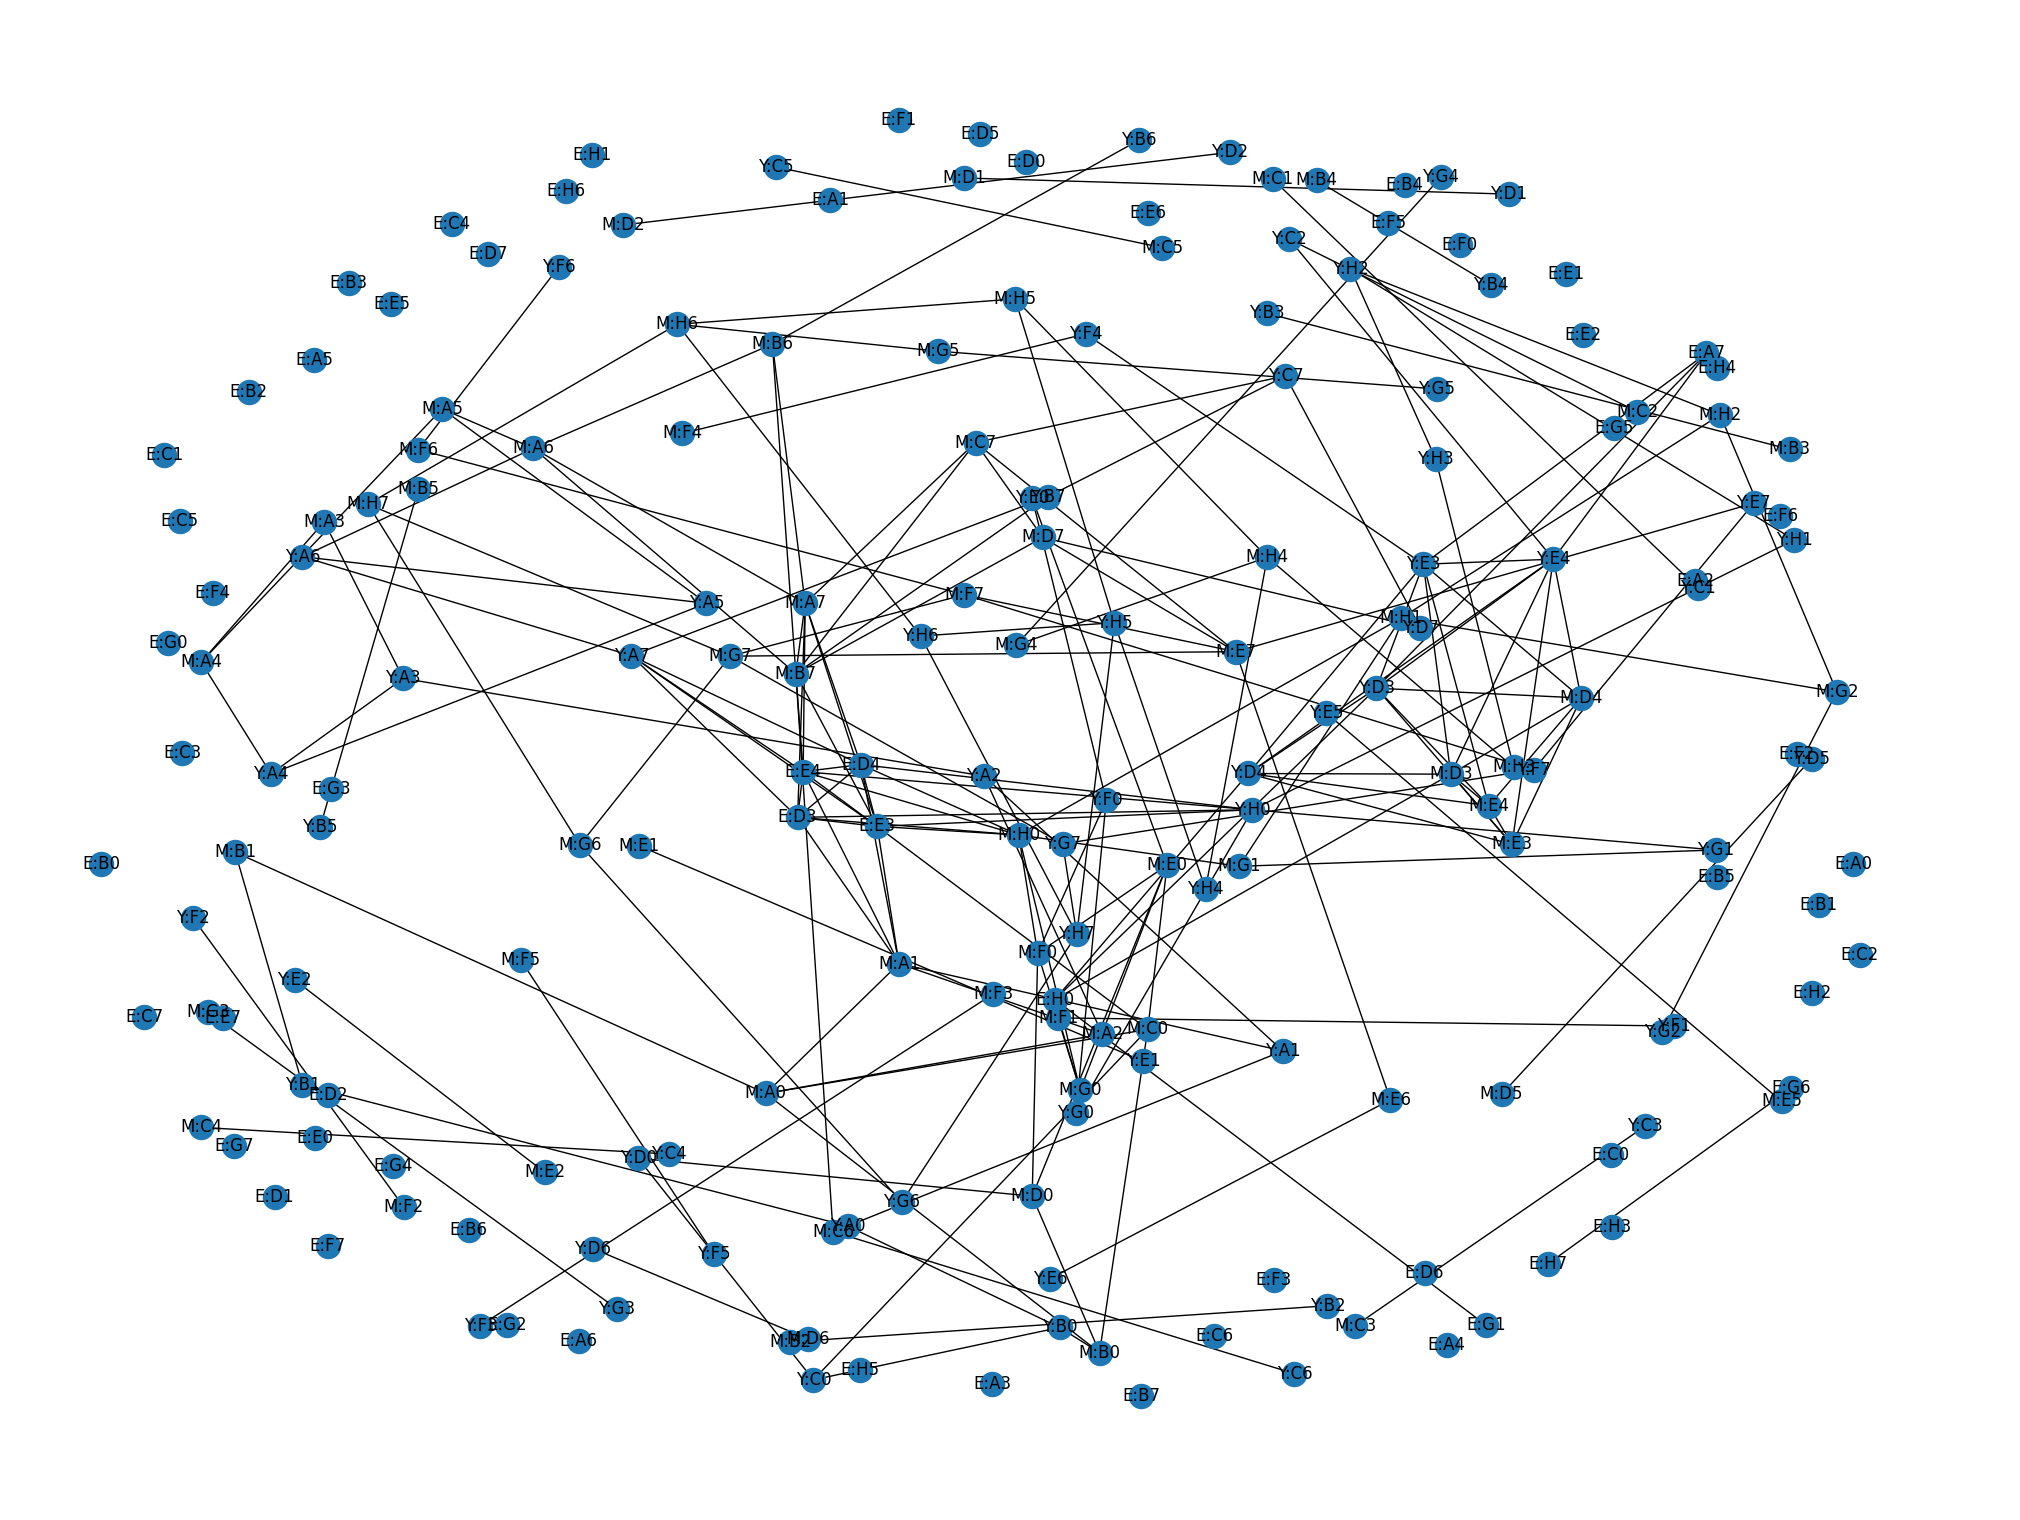

In [29]:
plt.figure(figsize=(20, 15))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G, k=0.5))
# set width and height to 1000 and do plt show
plt.show()

In [35]:
"""
Function that returns the connected groups in the graph, connected means that every member in the group has an edge to at leas k other members in the group
"""
def get_connected_groups(G, k = 2):
    connected_groups = []
    for node in G.nodes():
        group = set([node])
        for _ in range(k):
            new_group = set()
            for member in group:
                new_group.update(set(G.neighbors(member)))
            group.update(new_group)
        connected_groups.append(group)
    return connected_groups

connected_groups = get_connected_groups(G, k=2)
long_groups = [group for group in connected_groups if len(group) > 1]
for group in long_groups:
    print(group)
# print([group for group in connected_groups if len(group) > 1])

{'M:E3', 'E:A7', 'E:H0', 'Y:C2', 'Y:E3', 'M:E4', 'M:D3', 'M:D4', 'Y:D3', 'Y:E4', 'Y:F4', 'Y:D4'}
{'Y:A6', 'E:E3', 'Y:G1', 'M:A2', 'Y:B7', 'M:C7', 'M:G0', 'M:A6', 'M:A1', 'M:C0', 'M:F0', 'M:G1', 'E:D4', 'M:H0', 'Y:G0', 'E:D3', 'M:B7', 'M:A7', 'M:A0', 'Y:H0', 'M:H1', 'Y:A1', 'Y:A7', 'M:B6', 'Y:H1', 'E:E4'}
{'Y:A6', 'E:E3', 'Y:G1', 'M:A2', 'Y:B7', 'M:C7', 'M:G0', 'M:A6', 'M:A1', 'M:C0', 'M:F0', 'M:G1', 'E:D4', 'M:H0', 'Y:G0', 'E:D3', 'M:B7', 'M:A7', 'M:A0', 'Y:H0', 'M:H1', 'Y:A1', 'Y:A7', 'M:B6', 'Y:H1', 'E:E4'}
{'Y:A6', 'E:E3', 'Y:G1', 'M:A2', 'Y:B7', 'M:C7', 'M:E0', 'M:G0', 'M:A6', 'M:A1', 'M:C0', 'M:F0', 'M:C6', 'E:D4', 'M:G1', 'M:H0', 'Y:G0', 'E:D3', 'M:B7', 'M:A7', 'M:A0', 'Y:H0', 'Y:C0', 'M:D7', 'M:H1', 'Y:A1', 'Y:A7', 'M:B6', 'M:B0', 'Y:H1', 'E:E4'}
{'Y:A6', 'E:E3', 'Y:G1', 'M:A2', 'Y:B7', 'M:C7', 'M:G0', 'M:A6', 'M:A1', 'M:C0', 'M:F0', 'M:C6', 'E:D4', 'M:G1', 'M:H0', 'Y:G0', 'E:D3', 'M:B7', 'M:A7', 'M:A0', 'Y:H0', 'M:D7', 'M:H1', 'Y:A1', 'Y:A7', 'M:B6', 'Y:H1', 'E:E4'}
{'Y:D3', 'E